<a href="https://colab.research.google.com/github/Varun7860dixit/Diabetes_Prediction_System_using_SupervisedMachineLearning/blob/main/Diabetes_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Random Forest Accuracy: 0.9900
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Logistic Regression Accuracy: 0.7725
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       253
           1       0.77      0.54      0.63       147

    accuracy                           0.77       400
   macro avg       0.77      0.72      0.73       400
weighted avg       0.77      0.77      0.76       400


KNN Accuracy: 0.7925
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       253
           1       0.74      0.68      0.71       147

    accuracy                           0.79       400
   macro avg       0.78      0.77   

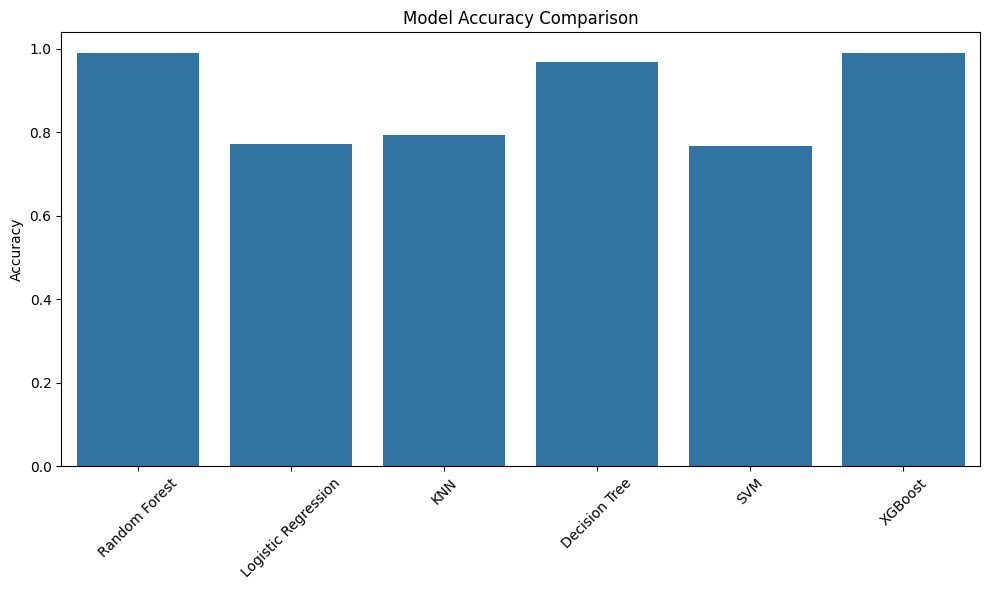

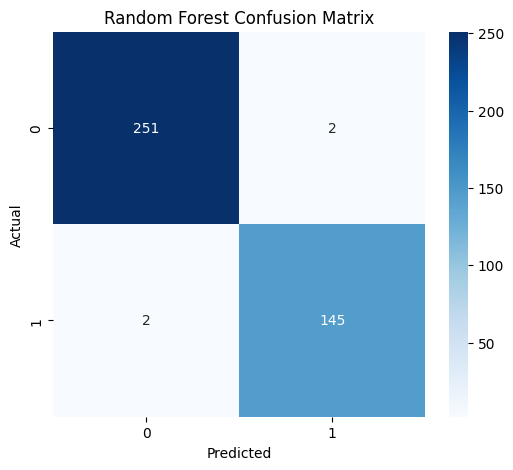

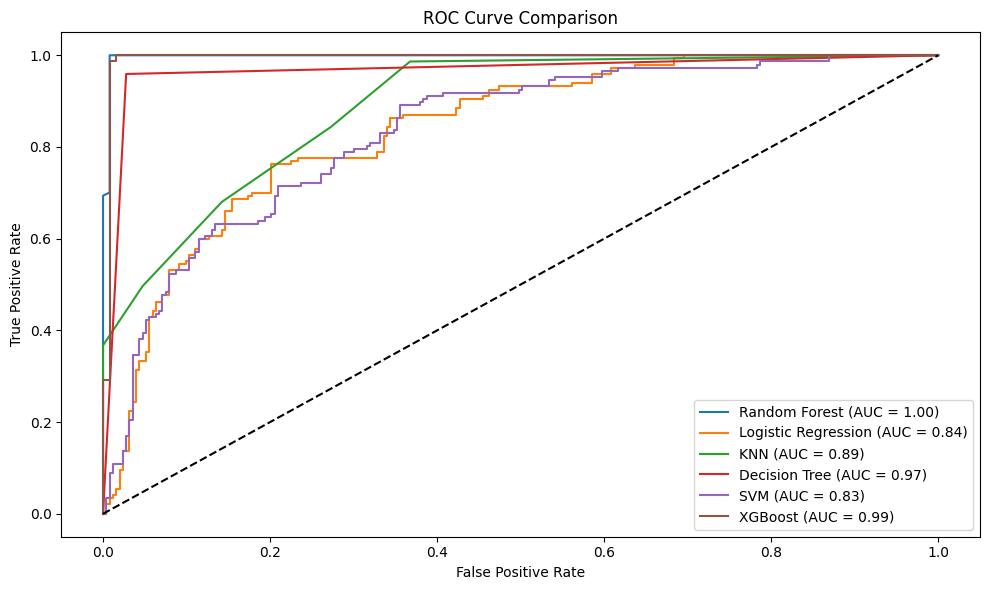

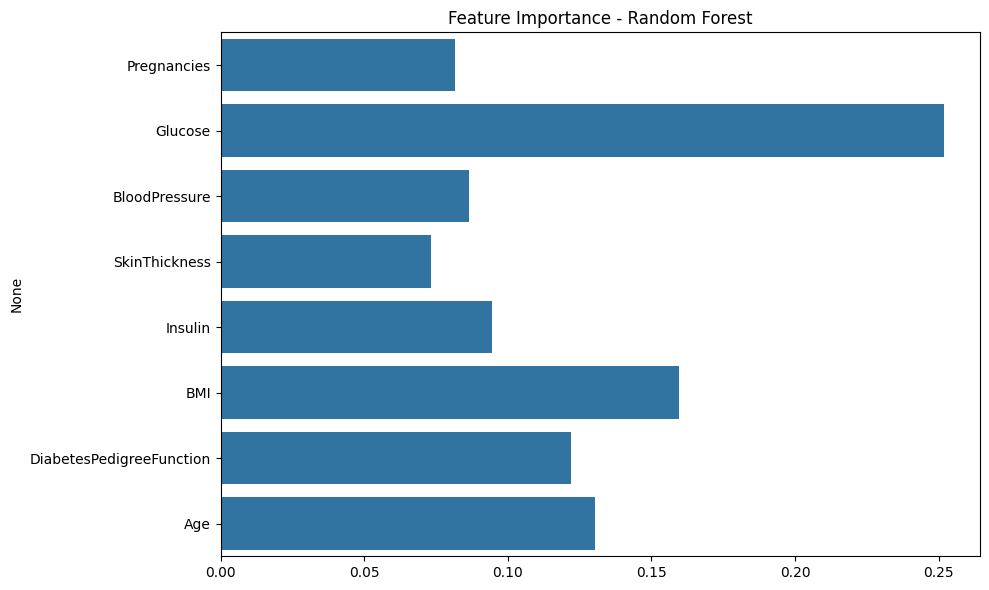


✅ Random Forest model saved as 'diabetes_random_forest.pkl'

🎯 Enter patient data to predict diabetes:
Pregnancies: 5
Glucose: 160
Blood Pressure: 75
Skin Thickness: 35
Insulin: 130
BMI: 33.6
Diabetes Pedigree Function: 0.65
Age: 45

Prediction: 🟥 Positive for Diabetes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# ---- PART 2: DATA PREPROCESSING ----
df = pd.read_csv("diabetes.csv")

# Replace zero values with NaN
cols_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
df[cols_to_fix] = df[cols_to_fix].fillna(df[cols_to_fix].median())

# Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- PART 3: MODEL TRAINING AND COMPARISON ----
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    results[name] = {
        "model": model,
        "accuracy": accuracy,
        "y_pred": y_pred,
        "y_proba": y_proba
    }
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# ---- PART 4: VISUALIZATION ----

# Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[r["accuracy"] for r in results.values()])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, results["Random Forest"]["y_pred"])
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Feature Importance from Random Forest
importances = results["Random Forest"]["model"].feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

# ---- PART 5: SAVE BEST MODEL ----
joblib.dump(results["Random Forest"]["model"], "diabetes_random_forest.pkl")
print("\n✅ Random Forest model saved as 'diabetes_random_forest.pkl'")

# ---- PART 6: PREDICT WITH USER INPUT ----
print("\n🎯 Enter patient data to predict diabetes:")

try:
    pregnancies = int(input("Pregnancies: "))
    glucose = int(input("Glucose: "))
    bp = int(input("Blood Pressure: "))
    skin = int(input("Skin Thickness: "))
    insulin = int(input("Insulin: "))
    bmi = float(input("BMI: "))
    dpf = float(input("Diabetes Pedigree Function: "))
    age = int(input("Age: "))

    sample = pd.DataFrame([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]],
                      columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
    model = joblib.load("diabetes_random_forest.pkl")
    prediction = model.predict(sample)
    result = "🟥 Positive for Diabetes" if prediction[0] == 1 else "🟩 Negative for Diabetes"
    print(f"\nPrediction: {result}")
except:
    print("⚠️ Invalid input. Please restart and enter valid values.")
